In [30]:
# import cv2
import numpy as np
# from keras.models import *
# from keras.layers import *
# from keras.optimizers import *
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping
# from keras import backend as keras
# from PIL import Image,ImageDraw
# from skimage import filters,img_as_float
# from skimage.io import imsave
import matplotlib.pyplot as plt

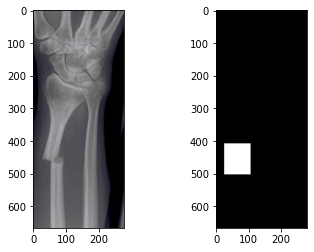

In [35]:
import xml.etree.ElementTree as ET
import os
fig, axs = plt.subplots(1,2)
images_train={}
for dirname, _, filenames in os.walk('./fracture/training'):
    for filename in filenames:
        img1=Image.open(os.path.join(dirname,filename)).convert('RGB')
        index=os.path.splitext(filename)[0]
#         print(filename)
        images_train[index]=img1
#         print(img1.size)
axs[0].imshow(images_train['236'])

image_train_annotations={}
for dirname, _, filenames in os.walk('./fracture/training_annotations'):
    for filename in filenames:
        tree=ET.parse(os.path.join(dirname,filename))
        root=tree.getroot()
        index_=os.path.splitext(filename)[0]
#         print(root)
        img=images_train[index_]
        width,height=img.size
        #print(width,height,type(img))
        if img == None:
            del images_train[index_]
            continue
        image=Image.new(mode='1',size=(width,height),color=0)
        image1=Image.new(mode='1',size=(width,height),color=1)
        #print(type(image))
        try:
            for objects in root.iter('bndbox'):
                start1,end1=(int(objects.find('xmin').text),int(objects.find('ymin').text))
                start2,end2=(int(objects.find('xmax').text),int(objects.find('ymax').text))
#                 print(start1,end1,start2,end2)
                image1=image1.crop((start1,end1,start2,end2))
#                 print(image1)
                image.paste(image1,(start1,end1,start2,end2))
#                 print(type(image))
            image_train_annotations[index_]=image
        except AttributeError:
            del images_train[index_]
        #print(image)
plt.imshow(image_train_annotations['236'])
        